In [13]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Analysis parameters
school_radius = 0.25 # in miles. Crimes commited within this distance of a school are tagged is_near_school=True

In [16]:

# Load all years of data
df_all = pd.DataFrame()
years = np.arange(2008, 2019, 2)
for year in years:
    data_file = 'data/' + str(year) + '_crimes_with_dist.csv'
    data = pd.read_csv(data_file)
    print(f'loaded {year} crimes data with {len(data)} records.')

    # Filter to relevant crime types
    data = data.loc[data['primary_type'].isin(['THEFT', 'BATTERY', 'NARCOTICS', 'WEAPONS VIOLATION', 'CRIMINAL DAMAGE'])]

    # Tag near schools
    data['is_near_school'] = data['nearest_school_dist'] < school_radius
    
    # Append this year of data to df
    df_all = df_all.append(data)

loaded 2008 crimes data with 419783 records.
loaded 2010 crimes data with 369786 records.
loaded 2012 crimes data with 335066 records.
loaded 2014 crimes data with 273573 records.
loaded 2016 crimes data with 266448 records.
loaded 2018 crimes data with 259784 records.


In [106]:
# Group by counts by crime type for all chicago
temp = df_all.reset_index()
df_allcrimes = temp[['primary_type', 'month', 'case_number']]
df_allcrimes = df_allcrimes.groupby(['primary_type', 'month']).count()
df_allcrimes = df_allcrimes.rename(columns = {'case_number': 'crime_count_all'})
df_allcrimes = df_allcrimes.reset_index()

# Group by counts by crime type near schools
df_schcrimes = temp[['primary_type', 'month', 'case_number']].loc[temp['is_near_school']==True]
df_schcrimes = df_schcrimes.groupby(['primary_type', 'month']).count()
df_schcrimes = df_schcrimes.rename(columns = {'case_number': 'crime_count_sch'})
df_schcrimes = df_schcrimes.reset_index()

# Merge all Chicago and near schools
df = df_allcrimes.merge(df_schcrimes, on=['primary_type', 'month'])

# Normalize by area
df['crime_rate_all'] = df['crime_count_all'] / 234.0
df['crime_rate_sch'] = df['crime_count_sch'] / (208 * school_radius**2 * 3.1415)

df.head()


,primary_type,month,crime_count_all,crime_count_sch,crime_rate_all,crime_rate_sch
0,BATTERY,1,25092,4931,107.230769,120.740949
1,BATTERY,2,23229,4752,99.269231,116.357938
2,BATTERY,3,29684,6062,126.854701,148.434726
3,BATTERY,4,29265,5755,125.064103,140.917494
4,BATTERY,5,34139,6788,145.893162,166.211633


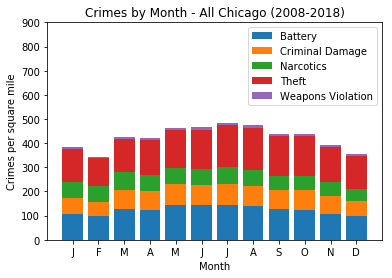

In [104]:
# Organize plotting data for All Chicago plot

month_names= ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
month_index = np.arange(12)

bat = np.asarray(df.loc[df['primary_type']=='BATTERY']['crime_rate_all'].values)
dmg = np.asarray(df.loc[df['primary_type']=='CRIMINAL DAMAGE']['crime_rate_all'].values)
narc = np.asarray(df.loc[df['primary_type']=='NARCOTICS']['crime_rate_all'].values)
theft = np.asarray(df.loc[df['primary_type']=='THEFT']['crime_rate_all'].values)
weap = np.asarray(df.loc[df['primary_type']=='WEAPONS VIOLATION']['crime_rate_all'].values)


plt.bar(month_index, bat, label='Battery')
plt.bar(month_index, dmg, label='Criminal Damage', bottom=bat)
plt.bar(month_index, narc, label='Narcotics', bottom= bat+dmg)
plt.bar(month_index, theft, label='Theft', bottom=bat +dmg + narc)
plt.bar(month_index, weap, label='Weapons Violation', bottom=bat+dmg+narc+theft)

plt.xticks(month_index, month_names)
plt.ylim(0,900)

plt.title('Crimes by Month - All Chicago (2008-2018)')
plt.xlabel('Month')
plt.ylabel('Crimes per square mile')
plt.legend(loc='best')
plt.savefig('crimesbymonth-allchicago.png')
plt.show()


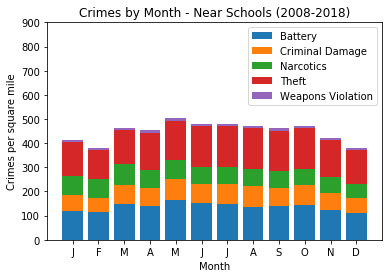

In [105]:
# Organize plotting data for Near Schools plot

month_names= ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
month_index = np.arange(12)

bat = np.asarray(df.loc[df['primary_type']=='BATTERY']['crime_rate_sch'].values)
dmg = np.asarray(df.loc[df['primary_type']=='CRIMINAL DAMAGE']['crime_rate_sch'].values)
narc = np.asarray(df.loc[df['primary_type']=='NARCOTICS']['crime_rate_sch'].values)
theft = np.asarray(df.loc[df['primary_type']=='THEFT']['crime_rate_sch'].values)
weap = np.asarray(df.loc[df['primary_type']=='WEAPONS VIOLATION']['crime_rate_sch'].values)

plt.bar(month_index, bat, label='Battery')
plt.bar(month_index, dmg, label='Criminal Damage', bottom=bat)
plt.bar(month_index, narc, label='Narcotics', bottom= bat+dmg)
plt.bar(month_index, theft, label='Theft', bottom=bat +dmg + narc)
plt.bar(month_index, weap, label='Weapons Violation', bottom=bat+dmg+narc+theft)

plt.xticks(month_index, month_names)
plt.ylim(0,900)

plt.title('Crimes by Month - Near Schools (2008-2018)')
plt.xlabel('Month')
plt.ylabel('Crimes per square mile')
plt.legend(loc='best')
plt.savefig('crimesbymonth-nearschools.png')
plt.show()
